In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [16]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
#handling missing data
df.experience = df.experience.fillna("five")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,five,8.0,9,50000
1,five,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [25]:
df.fillna(8.0)

,experience,test_score,interview_score,salary_in_dollors
0,five,8.0,9,50000
1,five,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [26]:
df.columns = ['experience', 'test_score', 'interview_score', 'salary_in_dollors']
df

,experience,test_score,interview_score,salary_in_dollors
0,five,8.0,9,50000
1,five,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [33]:
df = df.fillna(8.0)

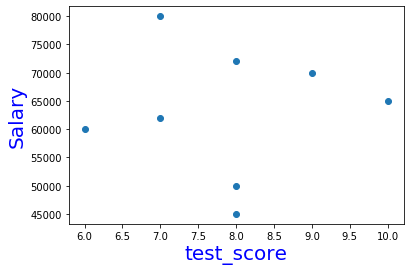

In [34]:
#plot scatter plots
%matplotlib inline
plt.xlabel("test_score", fontsize = 20, color = "blue")
plt.ylabel("Salary", fontsize = 20, color = "blue")
plt.scatter(df.test_score, df.salary_in_dollors)

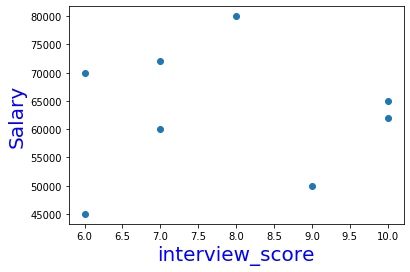

In [35]:
#plot scatter plots
%matplotlib inline
plt.xlabel("interview_score", fontsize = 20, color = "blue")
plt.ylabel("Salary", fontsize = 20, color = "blue")
plt.scatter(df.interview_score, df.salary_in_dollors)

In [36]:
df


,experience,test_score,interview_score,salary_in_dollors
0,five,8.0,9,50000
1,five,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [37]:
#create liner model
reg = linear_model.LinearRegression()
reg.fit(df[['interview_score', 'test_score']],df.salary_in_dollors)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.coef_


array([260.22304833,  47.08798017])

In [39]:
reg.intercept_

60579.92565055762

In [44]:
reg.predict([[3,6]])

array([61643.12267658])

In [46]:
total_score = df.interview_score+df.test_score
total_score

0    17.0
1    14.0
2    13.0
3    20.0
4    15.0
5    17.0
6    15.0
7    15.0
dtype: float64

ValueError: shapes (8,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

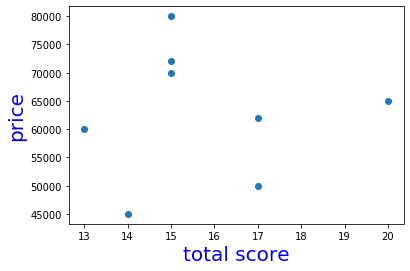

In [49]:
#plotiing linear regression line
%matplotlib inline
plt.xlabel("total score",fontsize = 20, color='blue')
plt.ylabel("price",fontsize = 20, color='blue')
plt.scatter(total_score,df.salary_in_dollors)
plt.plot(total_score,reg.predict(df[['salary_in_dollors']]))